<a href="https://colab.research.google.com/github/Omarelfarouk90/Multi-objective-COBYLA-optimization-for-supply-chain-mangment/blob/main/sensitivity_analysis_and_demand_manipulation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries needed

In [ ]:

import numpy as np
import math
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
import matplotlib.pyplot as plt

## Defining parameters related to demand

In [ ]:
#Factors for the third party in the supply chain%%
U_Demand = 12000#normrnd(mn,std)%Monte carlo simulation mean 12000 unit%
alpha = 0.1#Percentage of rate of return of products from third party%
lamda = alpha * U_Demand
miu =0.1#Probability of havieng a returned product in a good working condition% 
gamma=0.7#Probability of having a rerurned part after disassembly with good working condition%
 
Q_TP=(lamda*(miu))+(lamda*(1-miu)*gamma)#Quantity of the third party%
#pd = makedist('Poisson','lamda',12000)
#U_Demand = random(pd)

std  = 200 # 10000 runslamda and %
#U_Demand = round(random('Normal',12000,109));%400000;
#JDO1=[265;30;30;65;105;40;190;100;120;40;85;50;202];% demand curve fitting
#for daikin australia
pd_1 = 600#round(random('Normal',600,24.49));q
pd_2 = 60#round(random('Normal',60,7.749));
Z_var = U_Demand - pd_1-pd_2 
#Objective equation start#
#l=l+1;%Integrate i value in the loop%
                                #wa(l)=w1;%Store weight 1%
                               # wb(l)=w2;%Store weight 2%

## Defining parameters related to supply chain costs

In [ ]:
#Transportation Costs#
TS_s = 5000  #Transportation cost for the supplier(From alexandria road to downtown cairo)%
TS_m = 5000  #Transportation cost for the manufacturer(Assumed to be almost fixed due to practicallity)%
TS_d = 5000  #Transportation cost for the distributer%
TS_rt = 5000 #Transportation cost for the retailer%
TS_tp = 5000 #Transportation cost for the third party%
#collection Costs%%
C_tp = 5.1 #collection cost of recovering used product from the customer%
#facility opening Costs%%
F_rt = 10000000 #facility opening cost for the recovery center(Assumed to be 10 million  Egyptian pound)%
#Ordering Costs%%
S_s = 5.1
S_ms = 58.956
S_m1 = 700
S_m2 = 800
S_m3 = 850
S_d = 173.4
S_r = 204
S_tp = 42.5
#Holding Costs%%
H_s = 50.126
H_ms = 589.56
H_m = 1473.9
H_dr = 1734
H_rt = 2040
H_tp = 425.9571
#Production Rates%%
P_m1=200 #Production Rates assumed to be 200 unit per day for the power plant %%
P_m2=210
P_m3=220
#U_Demand = 400000 #Demand rate is asumed to be 400,000 unit per month%
P_m = P_m1+P_m2+P_m3 # Production rate of the manufacuter
#i_m #conunting of manufacturer%
#i_mp    
#i_d   #Counting of Distributer
 
##Factors for the third party in the supply chain##
alpha = 0.1 #Percentage of rate of return of products from third party%
lamda =(alpha*U_Demand) 
miu =0.1  #Probability of havieng a returned product in a good working condition% 
gamma=0.7 #Probability of having a rerurned part after disassembly with good working condition%
 
Q_TP =(lamda*(miu))+(lamda*(1-miu)*gamma)     #Quantity of the third party%
#Values of supplied chain quantities
n_s = 5                                           
n_m = 1                                           #1:2
n_d = 1 

## Defining variables related to stochastic supply chain model

In [ ]:
#input of optimized models data 
(lambda x : x[0])
def Q_rt1(x):
    return x[0] # quantity of the retailer in the forward cycle
def Q_rt2(x):
    return x[1] # quantity of the retailer in the forward cycle
def Q_rt3(x):
    return x[2] # quantity of the retailer in the forward cycle
def Q_d1(x):
    return x[3] # Quantity of the distributer
def Q_d2(x):
    return x[4] # Quantity of the distributer
def Q_d3(x):
    return x[5] # Quantity of the distributer
def Q_m1(x):
    return x[6] # Quantity of the Manufacturer
def Q_m2(x):
    return x[7] # Quantity of the Manufacturer
def Q_m3(x):
    return x[8] # Quantity of the Manufacturer
def Q_s1(x):
    return x[9] #Quantity of Supplied Parts
def Q_s2(x):
    return x[10] #Quantity of Supplied Parts
def Q_s3(x):
    return x[11] #Quantity of Supplied Parts                                          #1:2
#Cycle time of the supply chain#
def t_r(x):
    return (U_Demand)/(x[0])   #cycle time of the retailer
def t_d(x):
    return n_d * t_r(x)            #cycle time of the Distribiter
def t_m(x):
    return (n_m * n_d* t_r(x))    #cycle time of the Manufacturer
def t_s(x):
    return  n_s *n_m *n_d *t_r(x)  #cycle time of the supplier
def t_tp(x):
    return t_s(x)                  #cycle time of the third party

## Defining parameters related to sustainable Closed loop supply chain

In [ ]:
#
S_jfS=30   #Job Index factor number of fixed jobs at the supplier assumed to be 30 fixed employees %
S_jfM=30   #Job index for the number of fixed jobs by Mamufacturer assumed to be 30 fixed employees %
S_jfD=30   #Job index for the number of fixed jobs by distributer assumed to be 30 fixed employees%
S_jfRT=30 #Job index for the number of fixed jobs by retialer assumed to be 30 fixed employees%
S_jfTP=20 #Job index for the number of fixed jobs by third party recovery assumed to be 20 fixed employees%
S_jvS=270 #Job Index factor number of variable jobs at the supplier assumed to be 270 workers per facility%
S_jvM=270 #Job index for the number of variable jobs by Mamufacturer  270 workers per facility%
S_jvD=270 #Job index for the number of variable jobs by distributer  270 workers per facility%
S_jvRT=270#Job index for the number of variable jobs by retialer  270 workers per facility%
S_jvTP=100#Job index for the number of variable jobs by third party recovery  100 workers per facility%
S_u=20    #Employee satisfaction factor of the refurbrished parts for the third party disassembler%
S_rt=30   #Customer satisfaction factor of the refurbrished parts%
#Number of lost days at work%
S_ds=5  # Number of lost days from injuries or work damage at the suppliers / month%
S_dm=5  #Number of lost days from injuries or work damage at the manufactuer%
S_dd=5  #Number of lost days from injuries or work damage at the distributer%
S_drt=5 #Number of lost days from injuries or work damage at the retailer%
S_dtp=5 #Number of lost days from injuries or work damage at the third party%
#Enviromental Aspect of the supply chain (Emissions calculated from carbon footprint)%
E_q=10   #Emission factor from production line
E_tp=10  #Emission from wastes removal%
#Transportation emission cost%
E_ts=20   #Emission from Transportation made by the supplier%
E_tm=20   #Emission from Transportation made by the manufacturer%
E_td=20   #Emission from Transportation made by the distributer%
E_trt=20  #Emission from Transportation made by the retailer%
E_ttp=20  #Emission from Transportation made by the third party%

## Defining the stochastic CLSC model

In [ ]:
#for w1 in w11:
   #starting of the loop#   
#i_s = fun()
#if type(i_s) == int :# if the return value is an integer
    #do this
#    elif type(i_s) == str:# if the retrun value is string#
        #do this
i_s = 1 
i_ss=np.arange(i_s,n_s+1,1)
tc_s1= list(range(i_s,n_s+1))  
for i_s in i_ss:
    def tc_s1(x):
        tc_s1 = np.sum(((i_ss)/n_s)*(Q_s1(x))*(t_s(x)))
        return tc_s1
    i_s=i_s + 1  # Adding value of Supplier integer#
def tc_s4(x):
        tc_s4 = (tc_s1(x))
        return tc_s4 
def TC_s1(x):
        TC_s1 =  (S_s*(1/(n_s*t_s(x))))+(((H_s+TS_s)/(n_s*(t_s(x))))*tc_s4(x)) #cost of the supplier for component 1%
        return TC_s1
i_s= 1    #starting of the loop#         
i_ss=np.arange(i_s,n_s+1,1)
#for w1 in w11:
tc_s2= list(range(i_s,n_s+1))  
for i_s in i_ss:
    def tc_s2(x):
        tc_s2=np.sum((i_ss/n_s)*Q_s2(x)*t_s(x)) #((x(11)) +Q_TP#
        return tc_s2
    i_s = i_s + 1   #Adding value of Supplier integer
def tc_s5(x):    
    tc_s5 = (tc_s2(x))
    return tc_s5
def TC_s2(x):
    TC_s2 = (S_s*(1/(n_s*t_s(x))))+(((H_s+TS_s)/(n_s*(t_s(x))))*tc_s5(x))
    return TC_s2
i_s=1    #starting of the loop#         
tc_s3= list(range(i_s,n_s+1))  
for i_s in i_ss:
    def tc_s3(x):
        tc_s3=np.sum((i_ss/n_s)*Q_s3(x)*t_s(x))  #((x(12)+ Q_TP))%
        return  tc_s3
    i_s = i_s + 1   #Adding value of Supplier integer (No addition for Q_TP )%
def tc_s6(x):
    tc_s6 = tc_s3(x)
    return tc_s6
def TC_s3(x):
    TC_s3 = (S_s*(1/(n_s*t_s(x))))+(((H_s+TS_s)/(n_s*(t_s(x))))*tc_s6(x))  #cost of the supplier for component 3%
    return TC_s3
i_m = 1    #starting of the loop#   
i_mm=np.arange(i_m,n_m+1,1)
#for w1 in w11:
tc_m2= list(range(i_m,n_m+1))  
for i_m in i_mm:
    tc_m1 =np.arange(1,n_m,1) #Defining range with starting and ending point
    def tc_m2(x):
        tc_m2 = np.sum((1-((i_mm)/(n_m)))*((Q_m1(x))+Q_TP)) #Defining range with start & ending point#
        return tc_m2
    i_m=i_m + 1  # Adding value of manufacturer integer#
def tc_m3(x):
    tc_m3=(tc_m2(x))        
    return tc_m3
tc_s7 =np.arange(1,n_s,1) 
#Total cost of manufacturer#
tc_m = sum(tc_m1)
tc_s8 = sum(tc_s7)
def TC_m(x):
     TC_m =(H_m*((0.5*(Q_m1(x)**2)*(1/P_m1))\
              +(tc_m*(Q_m1(x)*t_m(x)*(1/(n_m**2))))))\
              +((S_m1+TS_m)*(1/t_m(x)))+((S_ms+TS_tp)*(1/t_s(x)))\
              +(H_ms*(1/t_s(x))*(((((Q_s1(x)+Q_TP)*Q_m1(x))/P_m1))\
                       +(tc_s8*(((Q_s1(x))+Q_TP)/n_s)*(t_m(x)-(Q_m1(x)/P_m1)))))              
     return TC_m 
def TC_m2(x):
    TC_m2 =(H_m*((0.5*(Q_m2(x)**2)*(1/P_m2))\
              +(tc_m*(Q_m2(x)*t_m(x)*(1/(n_m**2))))))\
              +((S_m2+TS_m)*(1/t_m(x)))+((S_ms+TS_tp)*(1/t_s(x)))\
              +(H_ms*(1/t_s(x))*(((((Q_s2(x)+Q_TP)*Q_m2(x))/P_m2))\
                       +(tc_s8*(((Q_s2(x))+Q_TP)/n_s)*(t_m(x)-(Q_m2(x)/P_m2)))))
    return TC_m2
def TC_m3(x):
    TC_m3 =(H_m*((0.5*(Q_m3(x)**2)*(1/P_m3))\
              +(tc_m*(Q_m3(x)*t_m(x)*(1/(n_m**2))))))\
              +((S_m3+TS_m)*(1/t_m(x)))+((S_ms+TS_tp)*(1/t_s(x)))\
              +(H_ms*(1/t_s(x))*(((((Q_s3(x)+Q_TP)*Q_m3(x))/P_m3))\
                       +(tc_s8*(((Q_s3(x))+Q_TP)/n_s)*(t_m(x)-(Q_m3(x)/P_m2)))))
                   #Cost of the manufacturer for product 3
    return TC_m3
i_d=1    #starting of the loop#         
i_dd=np.arange(i_d,n_d+1,1)
#for w1 in w11:
tc_d1= list(range(i_d,n_d+1))
tc_d2= list(range(i_d,n_d+1))
tc_d3= list(range(i_d,n_d+1))  
for i_d in i_dd:
    def tc_d1(x):
        tc_d1=np.sum(((i_dd)/(n_d))*(Q_d1(x)))    #Cost of the Distributer for Product 1%%
        return tc_d1
    def tc_d2(x):
        tc_d2=np.sum(((i_dd)/(n_d))*(Q_d2(x)))   #Cost of the Distributer for Product 2%%
        return tc_d2
    def tc_d3(x):
        tc_d3=np.sum(((i_d)/(n_d))*(Q_d3(x)))  #Cost of the Distributer for Product 3%%
        return tc_d3
    i_d = i_d + 1
def tc_d_f(x):
    tc_d_f = (tc_d1(x))+(tc_d2(x))+(tc_d3(x))
    return tc_d_f
def TC_d(x):
    TC_d = (H_dr*(tc_d_f(x)/n_d))+((S_d+TS_d)*(1/t_d(x)))  #Total cost of the distributer of the supply chain%
    return TC_d 
#Total cost of retailer
def TC_rt(x):     
    TC_rt = (H_rt*((Q_rt1(x))/2))+ ((S_r+TS_rt)*(1/t_r(x)))  #Cost of the retailer%%
    return TC_rt
def TC_rt2(x):
    TC_rt2=(H_rt*((Q_rt2(x))/2))+ ((S_r+TS_rt)*(1/t_r(x))) #Cost of the retailer for product 2%%
    return TC_rt2
def TC_rt3(x):
    TC_rt3 = (H_rt*((Q_rt3(x))/2))+ ((S_r+TS_rt)*(1/t_r(x))) #Cost of the retailer for product 3%%
    return TC_rt3
#Total cost of third party recovery 
def TC_tp(x):
    TC_tp = ((H_tp/2)*Q_TP)+((S_tp+TS_tp)*(1/t_tp(x)))
    return TC_tp
S_jfS=30   #Job Index factor number of fixed jobs at the supplier assumed to be 30 fixed employees %
S_jfM=30   #Job index for the number of fixed jobs by Mamufacturer assumed to be 30 fixed employees %
S_jfD=30   #Job index for the number of fixed jobs by distributer assumed to be 30 fixed employees%
S_jfRT=30 #Job index for the number of fixed jobs by retialer assumed to be 30 fixed employees%
S_jfTP=20 #Job index for the number of fixed jobs by third party recovery assumed to be 20 fixed employees%
S_jvS=270 #Job Index factor number of variable jobs at the supplier assumed to be 270 workers per facility%
S_jvM=270 #Job index for the number of variable jobs by Mamufacturer  270 workers per facility%
S_jvD=270 #Job index for the number of variable jobs by distributer  270 workers per facility%
S_jvRT=270#Job index for the number of variable jobs by retialer  270 workers per facility%
S_jvTP=100#Job index for the number of variable jobs by third party recovery  100 workers per facility%
S_u=20    #Employee satisfaction factor of the refurbrished parts for the third party disassembler%
S_rt=30   #Customer satisfaction factor of the refurbrished parts%
#Number of lost days at work%
S_ds=5  # Number of lost days from injuries or work damage at the suppliers / month%
S_dm=5  #Number of lost days from injuries or work damage at the manufactuer%
S_dd=5  #Number of lost days from injuries or work damage at the distributer%
S_drt=5 #Number of lost days from injuries or work damage at the retailer%
S_dtp=5 #Number of lost days from injuries or work damage at the third party%
#Enviromental Aspect of the supply chain (Emissions calculated from carbon footprint)%
E_q=10   #Emission factor from production line
E_tp=10  #Emission from wastes removal%
#Transportation emission cost%
E_ts=20   #Emission from Transportation made by the supplier%
E_tm=20   #Emission from Transportation made by the manufacturer%
E_td=20   #Emission from Transportation made by the distributer%
E_trt=20  #Emission from Transportation made by the retailer%
E_ttp=20  #Emission from Transportation made by the third party%
#Cycle time%
t_r  #cycle time of the retailer
t_d  #cycle time of the Distribiter
t_m #cycle time of the Manufacturer
t_s #cycle time of the supplier
t_tp #cycle time of the third party

#def objective(x):
   # return  (w1*EQO)-(w2*LSC)+(w3*ESC)
def EQO(x):
    EQO = TC_s1(x)+TC_s2(x)+TC_s3(x)+TC_m(x)+TC_m2(x)+TC_m3(x)+TC_d(x)+TC_rt(x)\
            +TC_rt2(x)+TC_rt3(x)+TC_tp(x)
    return EQO
    #Economical aspect#
def LSC(x):
    LSC =(S_jfS+S_jfM+S_jfD+S_jfRT+S_jfTP)\
     +((S_jvS*Q_s1(x))+(S_jvD*Q_d1(x))+(S_jvM*Q_m1(x))\
       +(S_jvRT*Q_rt1(x))+(S_jvTP*Q_TP))\
     +(S_u*(U_Demand))+(S_rt*Q_rt1(x))-(S_ds*Q_s1(x))\
       +(S_dd*Q_d1(x))+(S_dm*Q_m1(x))+(S_drt*Q_rt1(x))\
       +(S_dtp*Q_TP)#Social aspect equation%
    return LSC
def ESC(x):
    ESC=(E_q*(Q_s1(x)+Q_d1(x)+Q_m1(x)+Q_rt1(x)))\
    +(E_ts*(1/t_s(x)))+(E_td*(1/t_d(x)))\
    +(E_tm*(1/t_m(x)))+(E_trt*(1/t_r(x)))\
    +(E_ts*(1/t_tp(x)))+(E_tp*Q_TP)  #Enviromental aspect
    return ESC

## Implementing pareto frontier for multiobjective optimization and the COBYLA algorithm for the optimization process

Initial Objective: 452543640.9280915


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


Final Objective: 476595075.30238277
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454951975.7947582
Final Objective: 479018540.55396754
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457360310.6614249
Final Objective: 481442005.80555224
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000

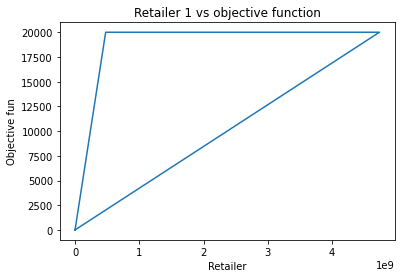

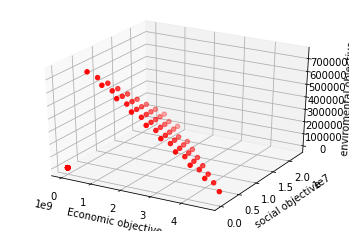

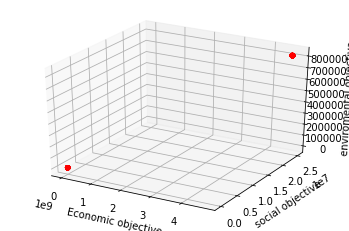

In [ ]:
f=1
j=1 
w11=np.arange(0.1,1.1,0.1)
solx=np.arange(1,11,1)
soly=np.arange(1,11,1)
solz=np.arange(1,11,1)
a0 = np.zeros(111)
a1 = np.zeros(111)
obj1 = np.zeros(111)
obj2 = np.zeros(111)
obj3 = np.zeros(111)
ob1 = np.zeros(111)
ob2 = np.zeros(111)
ob3 = np.zeros(111)
for w1 in w11:
#l=0;%Start indexing l value%
  w22=np.arange(0.1,1.1-w1,0.1)	
  for w2 in w22:
       w3=1.1-w1-w2
       def objective(x):
    #return  -(w2*LSC)
           return  (EQO(x)*w1)+(LSC(x)*w2)+(ESC(x)*w3)      
       U_Demand = 120000#normrnd(mn,std)%Monte carlo simulation mean 12000 unit%
       #dem = np.array([U_Demand])       #Storing demand #                 
       #Economic data%
       #solx[j]= EQO #Economical objective% 
       #Enviromental data%
       #soly[j]= ESC#Enviromental object
       #social data%
       #solz[j]= LSC#Economical objective%
            
       #j=j+1#Inceremental iteration
       #f=f+1 
       #Define constraint#
       def constraint1(x):
           return x[6]-U_Demand 
       def constraint2(x):
           return x[7]-U_Demand 
       def constraint3(x):
           return x[8]-U_Demand 
       #def constraint4(x):
           #return  U_Demand - (U_Demand-(3*std)) #Monte carlos Inequality#
       #def constraint5(x):
           #return (U_Demand+(3*std))-U_Demand
       def constraint6(x):
           return objective(x)-0
                    #C(1) = (n_s*(x[1]))-pd_1- x[0];
                    #C(2) = (n_s*(x[1]))-pd_1- x[0];
                    #C(3) = (n_mp*(x[2])) - x[1];
                    #C(4) = (n_mp*(x[2])) - x[1];
                    #C(5) = (n_d*x[3])- x[2];
                    #C(6) = (n_d*x[3])- x[2];
                    #C(7) = U_Demand - x[3];
                    #C(8) = U_Demand-x[3];
       def constraint7(x):
            return x[6]-(n_m*(x[3]))
       def constraint8(x):
            return x[7]-(n_m*(x[4]))
       def constraint9(x):
           return  x[8]-(n_m*(x[5]))
       def constraint13(x):
           return x[3]-(n_d*x[0])
       def constraint14(x):
           return x[4]- (n_d*x[1])
       def constraint15(x):
           return x[5]- (n_d*x[2])
       def constraint16(x):
            return ((x[9])+Q_TP)-(n_s*x[6])
       def constraint17(x):
            return ((x[10])+Q_TP)-(n_s*x[7])
       def constraint18(x):
            return ((x[11])+Q_TP)-(n_s*x[8])
       #def constraint10(x):
            #return x[9]-(n_s*x[6])
       #def constraint11(x):
            #return x[10]-(n_s*x[7])
       #def constraint12(x):
            #return x[11]-(n_s*x[8])


#Ceq(4) = (n_mp*(x[2])) - x[1];

# initial guesses
       n = 12
       x0 = np.zeros(n)
       x0[0] = 20000
       x0[1] = 20000
       x0[2] = 20000
       x0[3] = 20000
       x0[4] = 20000
       x0[5] = 20000
       x0[6] = 20000
       x0[7] = 20000
       x0[8] = 20000
       x0[9] = 20000
       x0[10] = 20000
       x0[11] = 20000
       # show initial objective
       print('Initial Objective: ' + str(objective(x0)))
       # optimize
       b = (1,100000)
       bnds = (b, b, b, b, b, b, b, b, b, b, b, b)
       #initial values
       initial_point=[20000.0,20000.0,20000.0,20000.0,
                      20000.0,20000.0,20000.0,20000.0,
                      20000.0,20000.0,20000.0,20000.0]    
       #lower and upper bound for variables
       bounds=[ [1,128000000],[1,128000000],[1,128000000],[1,128000000],
               [1,128000000],[1,128000000],[1,128000000],[1,128000000],
              [1,128000000],[1,128000000],[1,128000000],[1,128000000], ]

       #construct the bounds in the form of constraints
       cons = []
       for factor in range(len(bounds)):
           lower, upper = bounds[factor]
           l = {'type': 'ineq',
           'fun': lambda x, lb=lower, i=factor: x[i] - lb}
           u = {'type': 'ineq',
             'fun': lambda x, ub=upper, i=factor: ub - x[i]}
           cons.append(l)
           cons.append(u)
       con1 = {'type': 'ineq', 'fun': constraint1}
       cons.append(con1)
       con2 = {'type': 'ineq', 'fun': constraint2}
       cons.append(con2)
       con3 = {'type': 'ineq', 'fun': constraint3}
       cons.append(con3)
       #con4 = {'type': 'ineq', 'fun': constraint4}
       #con5 = {'type': 'ineq', 'fun': constraint5}
       con6 = {'type': 'ineq', 'fun': constraint6}
       cons.append(con6)
       con7 = {'type': 'ineq', 'fun': constraint7}
       cons.append(con7)
       con8 = {'type': 'ineq', 'fun': constraint8}
       cons.append(con8)
       con9 = {'type': 'ineq', 'fun': constraint9}
       cons.append(con9)
       #con10 = {'type': 'eq', 'fun': constraint10}
       #con11 = {'type': 'eq', 'fun': constraint11}
       #con12 = {'type': 'eq', 'fun': constraint12}
       con13 = {'type': 'ineq', 'fun': constraint13}
       cons.append(con13)
       con14 = {'type': 'ineq', 'fun': constraint14}
       cons.append(con14)
       con15 = {'type': 'ineq', 'fun': constraint15}
       cons.append(con15)
       con16 = {'type': 'ineq', 'fun': constraint16}
       cons.append(con16)
       con17 = {'type': 'ineq', 'fun': constraint17}
       cons.append(con17)
       con18 = {'type': 'ineq', 'fun': constraint18}
       cons.append(con18)
       
       #construct the bounds in the form of constraints


#similarly aditional constrains can be added
       solution = minimize(objective,x0,method='COBYLA',\
                    bounds=bnds,constraints=cons)
       #trust-constr #SLSQP options={'ftol': 1e-9, 'disp': True}
       x = solution.x
       # show final objective
       #print('Final Objective: ' + str(objective(x)))

# show final objective
       print('Final Objective: ' + str(objective(x)))
# print solution
       print('Solution')
       print('Qrt1 = ' + str(x[0]))
       print('Qrt2 = ' + str(x[1]))
       print('Qrt3 = ' + str(x[2]))
       print('Qd1 = ' + str(x[3]))
       print('Qd2 = ' + str(x[4]))
       print('Qd3 = ' + str(x[5]))
       print('Qm1 = ' + str(x[6]))
       print('Qm2 = ' + str(x[7]))
       print('Qm3 = ' + str(x[8]))
       print('Qs1 = ' + str(x[9]))
       print('Qs2 = ' + str(x[10]))
       print('Qs3 = ' + str(x[11]))
       print('w1 = ' +str(w1))
       print('w2 = ' +str(w2))
       print('w3 = ' +str(w3))
       a0[j]= str(objective(x))
       obj1[j]= str(EQO(x)*w1)
       obj2[j]=str(LSC(x)*w2) 
       obj3[j]=str(ESC(x)*w3)
       ob1[j]= str(EQO(x))
       ob2[j]=str(LSC(x)) 
       ob3[j]=str(ESC(x))
       a1[j]= str(x[0])
       j=j+1
plt.plot(a0,a1,label='Retailer 1 vs objective')
par_obj=np.vstack((a0,obj1,obj2,obj3 )).T
z = min(a0)
par_obj


par_obj2=np.vstack((a0,ob1,ob2,ob3 )).T
z = min(a0)
par_obj2

plt.xlabel('Retailer')
plt.ylabel('Objective fun')
plt.title('Retailer 1 vs objective function')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(obj1, obj2, obj3, c='r', marker='o')

ax.set_xlabel('Economic objective')
ax.set_ylabel('social objective')
ax.set_zlabel('enviromental objective')

plt.show()


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ob1, ob2, ob3, c='r', marker='o')

ax.set_xlabel('Economic objective')
ax.set_ylabel('social objective')
ax.set_zlabel('enviromental objective')

plt.show()

## Applying the plotly library on the multiobjective results

In [ ]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure(data=[go.Scatter3d(x=ob1, y=ob2, z=ob3,
                                   mode='markers')])
fig.show()

# Final senstivity analysis plot display 

Initial Objective: 452543410.69581866


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476594836.9314695
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454951750.23794067
Final Objective: 479018306.85850954
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457360089.7800627
Final Objective: 481441776.78554964
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000

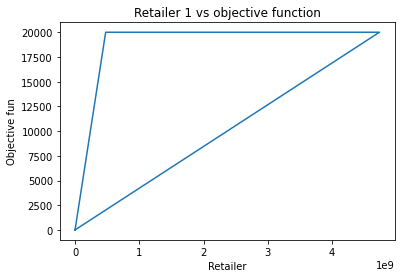

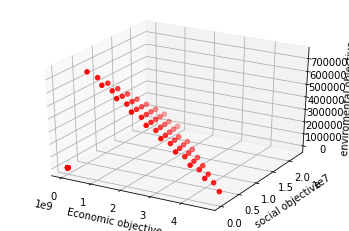

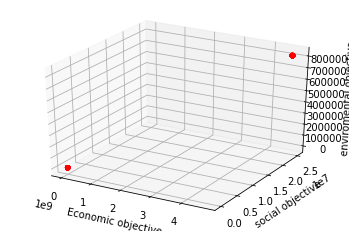

the economic optimal value is 4733568823.018366
Initial Objective: 452545333.2454683


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476596827.4426611
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454953633.74530095
Final Objective: 479020258.3274118
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457361934.2451336
Final Objective: 481443689.2121625
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.0

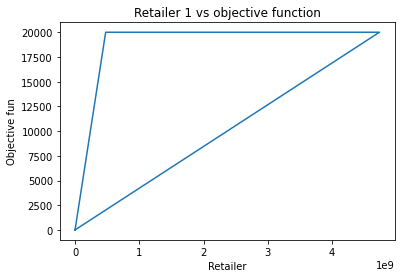

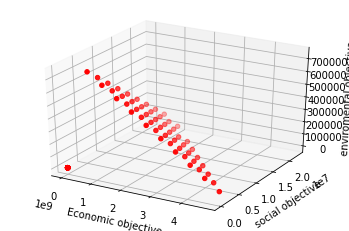

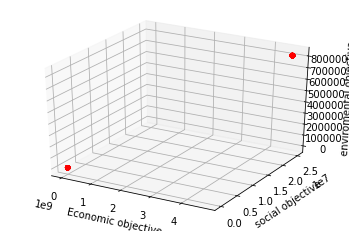

the economic optimal value is 4733589529.524643
Initial Objective: 452542985.311977


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476594396.5104393
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454951333.4926063
Final Objective: 479017875.0759866
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457359681.6732355
Final Objective: 481441353.6415339
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.00

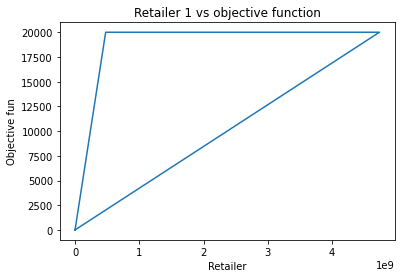

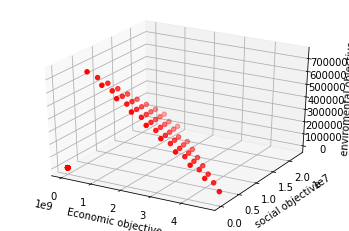

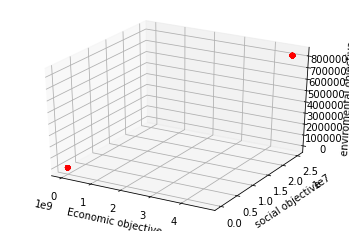

the economic optimal value is 4733564241.491337
Initial Objective: 452544524.1928814


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476595989.79031277
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454952841.12259674
Final Objective: 479019437.1049462
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457361158.0523121
Final Objective: 481442884.4195795
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.

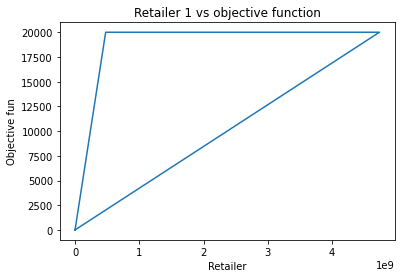

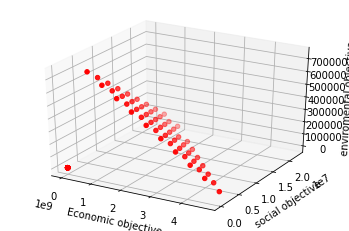

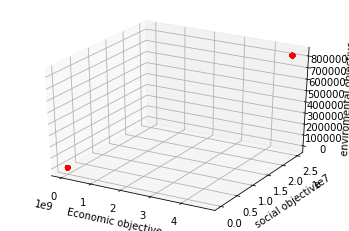

the economic optimal value is 4733580815.756199
Initial Objective: 452542679.70568025


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476594080.10105336
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454951034.0924272
Final Objective: 479017564.87271833
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457359388.4791742
Final Objective: 481441049.6443834
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.

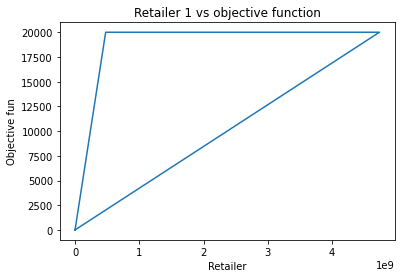

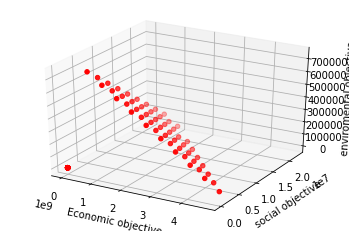

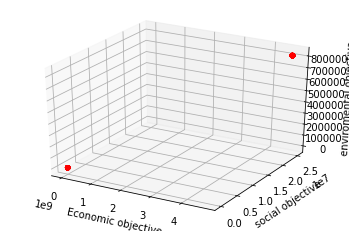

the economic optimal value is 4733560950.008744
Initial Objective: 452544392.8163459


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476595853.7696569
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454952712.4139978
Final Objective: 479019303.75222695
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457361032.01164985
Final Objective: 481442753.734797
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.0

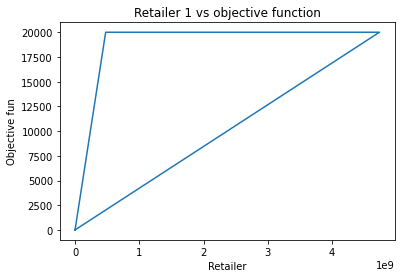

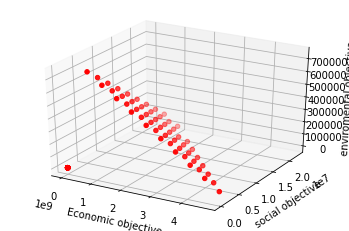

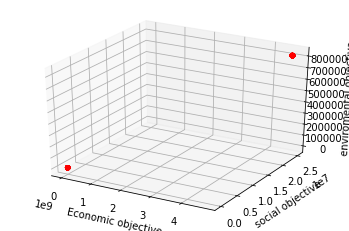

the economic optimal value is 4733579400.78673
Initial Objective: 452543333.9723889


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476594757.49588996
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454951675.0725764
Final Objective: 479018228.9809956
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457360016.17276394
Final Objective: 481441700.4661012
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.

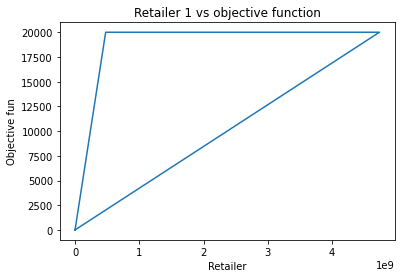

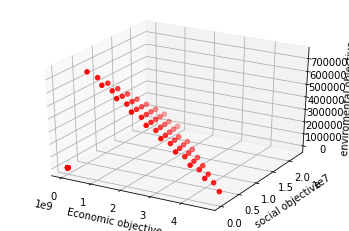

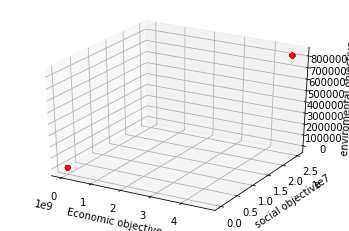

the economic optimal value is 4733567996.681226
Initial Objective: 452543688.8351215


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476595124.90291166
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454952022.72891337
Final Objective: 479018589.18162155
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457360356.6227052
Final Objective: 481442053.46033144
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 2000

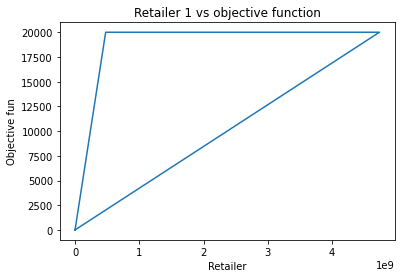

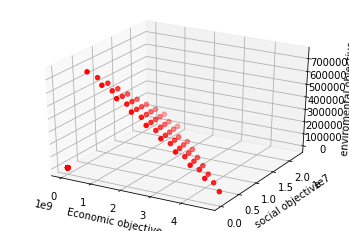

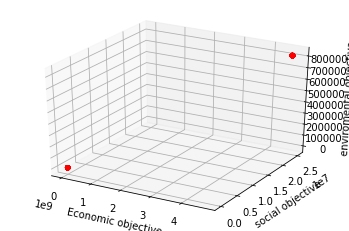

the economic optimal value is 4733571818.672195
Initial Objective: 452543937.9689951


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476595382.8435915
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454952266.8034863
Final Objective: 479018842.06300074
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457360595.6379774
Final Objective: 481442301.28240997
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.

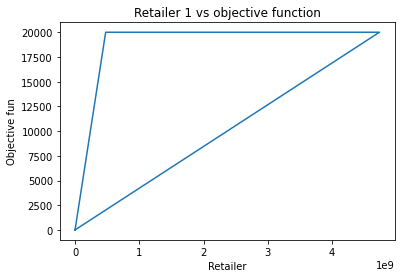

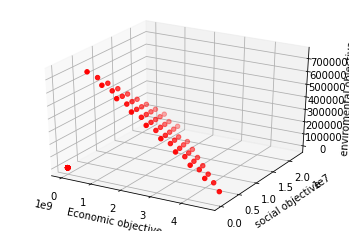

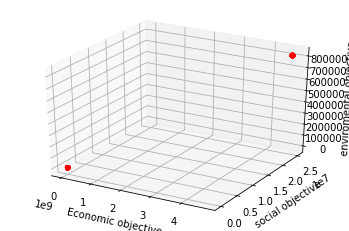

the economic optimal value is 4733574501.927798
Initial Objective: 452542413.6123115


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning:

Method COBYLA cannot handle bounds.



Final Objective: 476593804.60136557
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.1
w3 = 0.9
Initial Objective: 454950773.4027651
Final Objective: 479017294.7767372
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.000000399763
Qm1 = 20569.844715688727
Qm2 = 20569.844715688727
Qm3 = 20569.844715688727
Qs1 = 20000.00000040016
Qs2 = 20000.000000399945
Qs3 = 20000.000000400207
w1 = 0.1
w2 = 0.2
w3 = 0.8
Initial Objective: 457359133.1932187
Final Objective: 481440784.9521089
Solution
Qrt1 = 20000.999999599728
Qrt2 = 20000.000000400272
Qrt3 = 20000.00000040017
Qd1 = 20000.00000039931
Qd2 = 20000.000000400294
Qd3 = 20000.0

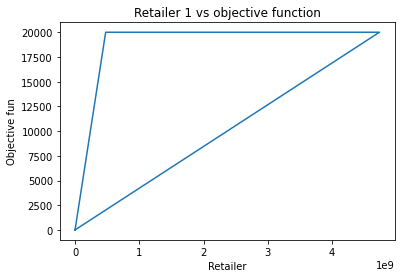

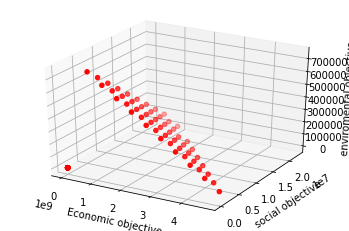

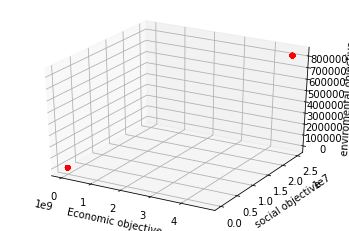

the economic optimal value is 4733558084.0936775


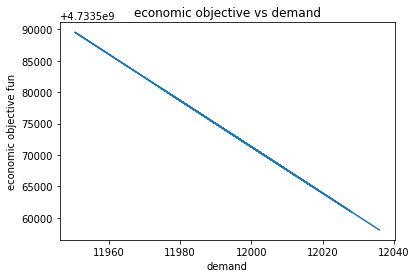

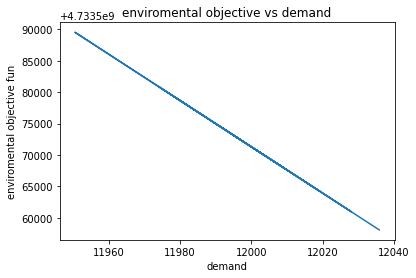

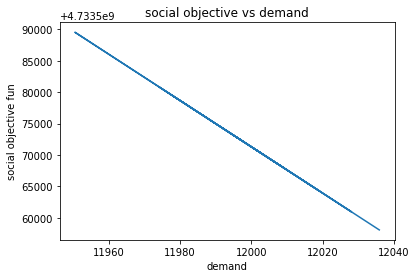

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 10 15:46:28 2019

@author: omar.elfarouk
"""

import numpy as np
import math
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
import matplotlib.pyplot as plt
p=0
de=np.arange(p,10,1)
mu, sigma = 12000, 20 #mean and standard deviation
dmns = np.random.default_rng().normal(mu, sigma, 10)
ecco=np.arange(0,10,1)
envo=np.arange(0,10,1)
soco=np.arange(0,10,1)
for p in de:
    #Factors for the third party in the supply chain%%
    U_Demand =  dmns[p]#normrnd(mn,std)%Monte carlo simulation mean 12000 unit%
    alpha = 0.1#Percentage of rate of return of products from third party%
    lamda = alpha * U_Demand
    miu =0.1#Probability of havieng a returned product in a good working condition% 
    gamma=0.7#Probability of having a rerurned part after disassembly with good working condition%

    Q_TP=(lamda*(miu))+(lamda*(1-miu)*gamma)#Quantity of the third party%
    #pd = makedist('Poisson','lamda',12000)
    #U_Demand = random(pd)

    std  = 200 # 10000 runslamda and %
    #U_Demand = round(random('Normal',12000,109));%400000;
    #JDO1=[265;30;30;65;105;40;190;100;120;40;85;50;202];% demand curve fitting
    #for daikin australia
    pd_1 = 600#round(random('Normal',600,24.49));q
    pd_2 = 60#round(random('Normal',60,7.749));
    Z_var = U_Demand - pd_1-pd_2 
    #Objective equation start#
    #l=l+1;%Integrate i value in the loop%
                                    #wa(l)=w1;%Store weight 1%
                                   # wb(l)=w2;%Store weight 2%
    #Transportation Costs#
    TS_s = 5000  #Transportation cost for the supplier(From alexandria road to downtown cairo)%
    TS_m = 5000  #Transportation cost for the manufacturer(Assumed to be almost fixed due to practicallity)%
    TS_d = 5000  #Transportation cost for the distributer%
    TS_rt = 5000 #Transportation cost for the retailer%
    TS_tp = 5000 #Transportation cost for the third party%
    #collection Costs%%
    C_tp = 5.1 #collection cost of recovering used product from the customer%
    #facility opening Costs%%
    F_rt = 10000000 #facility opening cost for the recovery center(Assumed to be 10 million  Egyptian pound)%
    #Ordering Costs%%
    S_s = 5.1
    S_ms = 58.956
    S_m1 = 700
    S_m2 = 800
    S_m3 = 850
    S_d = 173.4
    S_r = 204
    S_tp = 42.5
    #Holding Costs%%
    H_s = 50.126
    H_ms = 589.56
    H_m = 1473.9
    H_dr = 1734
    H_rt = 2040
    H_tp = 425.9571
    #Production Rates%%
    P_m1=200 #Production Rates assumed to be 200 unit per day for the power plant %%
    P_m2=210
    P_m3=220
    #U_Demand = 400000 #Demand rate is asumed to be 400,000 unit per month%
    P_m = P_m1+P_m2+P_m3 # Production rate of the manufacuter
    #i_m #conunting of manufacturer%
    #i_mp    
    #i_d   #Counting of Distributer

    ##Factors for the third party in the supply chain##
    alpha = 0.1 #Percentage of rate of return of products from third party%
    lamda =(alpha*U_Demand) 
    miu =0.1  #Probability of havieng a returned product in a good working condition% 
    gamma=0.7 #Probability of having a rerurned part after disassembly with good working condition%

    Q_TP =(lamda*(miu))+(lamda*(1-miu)*gamma)     #Quantity of the third party%
    #Values of supplied chain quantities
    n_s = 5                                           
    n_m = 1                                           #1:2
    n_d = 1 
    #input of optimized models data 
    (lambda x : x[0])
    def Q_rt1(x):
        return x[0] # quantity of the retailer in the forward cycle
    def Q_rt2(x):
        return x[1] # quantity of the retailer in the forward cycle
    def Q_rt3(x):
        return x[2] # quantity of the retailer in the forward cycle
    def Q_d1(x):
        return x[3] # Quantity of the distributer
    def Q_d2(x):
        return x[4] # Quantity of the distributer
    def Q_d3(x):
        return x[5] # Quantity of the distributer
    def Q_m1(x):
        return x[6] # Quantity of the Manufacturer
    def Q_m2(x):
        return x[7] # Quantity of the Manufacturer
    def Q_m3(x):
        return x[8] # Quantity of the Manufacturer
    def Q_s1(x):
        return x[9] #Quantity of Supplied Parts
    def Q_s2(x):
        return x[10] #Quantity of Supplied Parts
    def Q_s3(x):
        return x[11] #Quantity of Supplied Parts                                          #1:2
    #Cycle time of the supply chain#
    def t_r(x):
        return (U_Demand)/(x[0])   #cycle time of the retailer
    def t_d(x):
        return n_d * t_r(x)            #cycle time of the Distribiter
    def t_m(x):
        return (n_m * n_d* t_r(x))    #cycle time of the Manufacturer
    def t_s(x):
        return  n_s *n_m *n_d *t_r(x)  #cycle time of the supplier
    def t_tp(x):
        return t_s(x)                  #cycle time of the third party
    #
    S_jfS=30   #Job Index factor number of fixed jobs at the supplier assumed to be 30 fixed employees %
    S_jfM=30   #Job index for the number of fixed jobs by Mamufacturer assumed to be 30 fixed employees %
    S_jfD=30   #Job index for the number of fixed jobs by distributer assumed to be 30 fixed employees%
    S_jfRT=30 #Job index for the number of fixed jobs by retialer assumed to be 30 fixed employees%
    S_jfTP=20 #Job index for the number of fixed jobs by third party recovery assumed to be 20 fixed employees%
    S_jvS=270 #Job Index factor number of variable jobs at the supplier assumed to be 270 workers per facility%
    S_jvM=270 #Job index for the number of variable jobs by Mamufacturer  270 workers per facility%
    S_jvD=270 #Job index for the number of variable jobs by distributer  270 workers per facility%
    S_jvRT=270#Job index for the number of variable jobs by retialer  270 workers per facility%
    S_jvTP=100#Job index for the number of variable jobs by third party recovery  100 workers per facility%
    S_u=20    #Employee satisfaction factor of the refurbrished parts for the third party disassembler%
    S_rt=30   #Customer satisfaction factor of the refurbrished parts%
    #Number of lost days at work%
    S_ds=5  # Number of lost days from injuries or work damage at the suppliers / month%
    S_dm=5  #Number of lost days from injuries or work damage at the manufactuer%
    S_dd=5  #Number of lost days from injuries or work damage at the distributer%
    S_drt=5 #Number of lost days from injuries or work damage at the retailer%
    S_dtp=5 #Number of lost days from injuries or work damage at the third party%
    #Enviromental Aspect of the supply chain (Emissions calculated from carbon footprint)%
    E_q=10   #Emission factor from production line
    E_tp=10  #Emission from wastes removal%
    #Transportation emission cost%
    E_ts=20   #Emission from Transportation made by the supplier%
    E_tm=20   #Emission from Transportation made by the manufacturer%
    E_td=20   #Emission from Transportation made by the distributer%
    E_trt=20  #Emission from Transportation made by the retailer%
    E_ttp=20  #Emission from Transportation made by the third party%
    #for w1 in w11:
       #starting of the loop#   
    #i_s = fun()
    #if type(i_s) == int :# if the return value is an integer
        #do this
    #    elif type(i_s) == str:# if the retrun value is string#
            #do this
    i_s = 1 
    i_ss=np.arange(i_s,n_s+1,1)
    tc_s1= list(range(i_s,n_s+1))  
    for i_s in i_ss:
        def tc_s1(x):
            tc_s1 = np.sum(((i_ss)/n_s)*(Q_s1(x))*(t_s(x)))
            return tc_s1
        i_s=i_s + 1  # Adding value of Supplier integer#
    def tc_s4(x):
            tc_s4 = (tc_s1(x))
            return tc_s4 
    def TC_s1(x):
            TC_s1 =  (S_s*(1/(n_s*t_s(x))))+(((H_s+TS_s)/(n_s*(t_s(x))))*tc_s4(x)) #cost of the supplier for component 1%
            return TC_s1
    i_s= 1    #starting of the loop#         
    i_ss=np.arange(i_s,n_s+1,1)
    #for w1 in w11:
    tc_s2= list(range(i_s,n_s+1))  
    for i_s in i_ss:
        def tc_s2(x):
            tc_s2=np.sum((i_ss/n_s)*Q_s2(x)*t_s(x)) #((x(11)) +Q_TP#
            return tc_s2
        i_s = i_s + 1   #Adding value of Supplier integer
    def tc_s5(x):    
        tc_s5 = (tc_s2(x))
        return tc_s5
    def TC_s2(x):
        TC_s2 = (S_s*(1/(n_s*t_s(x))))+(((H_s+TS_s)/(n_s*(t_s(x))))*tc_s5(x))
        return TC_s2
    i_s=1    #starting of the loop#         
    tc_s3= list(range(i_s,n_s+1))  
    for i_s in i_ss:
        def tc_s3(x):
            tc_s3=np.sum((i_ss/n_s)*Q_s3(x)*t_s(x))  #((x(12)+ Q_TP))%
            return  tc_s3
        i_s = i_s + 1   #Adding value of Supplier integer (No addition for Q_TP )%
    def tc_s6(x):
        tc_s6 = tc_s3(x)
        return tc_s6
    def TC_s3(x):
        TC_s3 = (S_s*(1/(n_s*t_s(x))))+(((H_s+TS_s)/(n_s*(t_s(x))))*tc_s6(x))  #cost of the supplier for component 3%
        return TC_s3
    i_m = 1    #starting of the loop#   
    i_mm=np.arange(i_m,n_m+1,1)
    #for w1 in w11:
    tc_m2= list(range(i_m,n_m+1))  
    for i_m in i_mm:
        tc_m1 =np.arange(1,n_m,1) #Defining range with starting and ending point
        def tc_m2(x):
            tc_m2 = np.sum((1-((i_mm)/(n_m)))*((Q_m1(x))+Q_TP)) #Defining range with start & ending point#
            return tc_m2
        i_m=i_m + 1  # Adding value of manufacturer integer#
    def tc_m3(x):
        tc_m3=(tc_m2(x))        
        return tc_m3
    tc_s7 =np.arange(1,n_s,1) 
    #Total cost of manufacturer#
    tc_m = sum(tc_m1)
    tc_s8 = sum(tc_s7)
    def TC_m(x):
         TC_m =(H_m*((0.5*(Q_m1(x)**2)*(1/P_m1))\
                  +(tc_m*(Q_m1(x)*t_m(x)*(1/(n_m**2))))))\
                  +((S_m1+TS_m)*(1/t_m(x)))+((S_ms+TS_tp)*(1/t_s(x)))\
                  +(H_ms*(1/t_s(x))*(((((Q_s1(x)+Q_TP)*Q_m1(x))/P_m1))\
                           +(tc_s8*(((Q_s1(x))+Q_TP)/n_s)*(t_m(x)-(Q_m1(x)/P_m1)))))              
         return TC_m 
    def TC_m2(x):
        TC_m2 =(H_m*((0.5*(Q_m2(x)**2)*(1/P_m2))\
                  +(tc_m*(Q_m2(x)*t_m(x)*(1/(n_m**2))))))\
                  +((S_m2+TS_m)*(1/t_m(x)))+((S_ms+TS_tp)*(1/t_s(x)))\
                  +(H_ms*(1/t_s(x))*(((((Q_s2(x)+Q_TP)*Q_m2(x))/P_m2))\
                           +(tc_s8*(((Q_s2(x))+Q_TP)/n_s)*(t_m(x)-(Q_m2(x)/P_m2)))))
        return TC_m2
    def TC_m3(x):
        TC_m3 =(H_m*((0.5*(Q_m3(x)**2)*(1/P_m3))\
                  +(tc_m*(Q_m3(x)*t_m(x)*(1/(n_m**2))))))\
                  +((S_m3+TS_m)*(1/t_m(x)))+((S_ms+TS_tp)*(1/t_s(x)))\
                  +(H_ms*(1/t_s(x))*(((((Q_s3(x)+Q_TP)*Q_m3(x))/P_m3))\
                           +(tc_s8*(((Q_s3(x))+Q_TP)/n_s)*(t_m(x)-(Q_m3(x)/P_m2)))))
                       #Cost of the manufacturer for product 3
        return TC_m3
    i_d=1    #starting of the loop#         
    i_dd=np.arange(i_d,n_d+1,1)
    #for w1 in w11:
    tc_d1= list(range(i_d,n_d+1))
    tc_d2= list(range(i_d,n_d+1))
    tc_d3= list(range(i_d,n_d+1))  
    for i_d in i_dd:
        def tc_d1(x):
            tc_d1=np.sum(((i_dd)/(n_d))*(Q_d1(x)))    #Cost of the Distributer for Product 1%%
            return tc_d1
        def tc_d2(x):
            tc_d2=np.sum(((i_dd)/(n_d))*(Q_d2(x)))   #Cost of the Distributer for Product 2%%
            return tc_d2
        def tc_d3(x):
            tc_d3=np.sum(((i_d)/(n_d))*(Q_d3(x)))  #Cost of the Distributer for Product 3%%
            return tc_d3
        i_d = i_d + 1
    def tc_d_f(x):
        tc_d_f = (tc_d1(x))+(tc_d2(x))+(tc_d3(x))
        return tc_d_f
    def TC_d(x):
        TC_d = (H_dr*(tc_d_f(x)/n_d))+((S_d+TS_d)*(1/t_d(x)))  #Total cost of the distributer of the supply chain%
        return TC_d 
    #Total cost of retailer
    def TC_rt(x):     
        TC_rt = (H_rt*((Q_rt1(x))/2))+ ((S_r+TS_rt)*(1/t_r(x)))  #Cost of the retailer%%
        return TC_rt
    def TC_rt2(x):
        TC_rt2=(H_rt*((Q_rt2(x))/2))+ ((S_r+TS_rt)*(1/t_r(x))) #Cost of the retailer for product 2%%
        return TC_rt2
    def TC_rt3(x):
        TC_rt3 = (H_rt*((Q_rt3(x))/2))+ ((S_r+TS_rt)*(1/t_r(x))) #Cost of the retailer for product 3%%
        return TC_rt3
    #Total cost of third party recovery 
    def TC_tp(x):
        TC_tp = ((H_tp/2)*Q_TP)+((S_tp+TS_tp)*(1/t_tp(x)))
        return TC_tp
    S_jfS=30   #Job Index factor number of fixed jobs at the supplier assumed to be 30 fixed employees %
    S_jfM=30   #Job index for the number of fixed jobs by Mamufacturer assumed to be 30 fixed employees %
    S_jfD=30   #Job index for the number of fixed jobs by distributer assumed to be 30 fixed employees%
    S_jfRT=30 #Job index for the number of fixed jobs by retialer assumed to be 30 fixed employees%
    S_jfTP=20 #Job index for the number of fixed jobs by third party recovery assumed to be 20 fixed employees%
    S_jvS=270 #Job Index factor number of variable jobs at the supplier assumed to be 270 workers per facility%
    S_jvM=270 #Job index for the number of variable jobs by Mamufacturer  270 workers per facility%
    S_jvD=270 #Job index for the number of variable jobs by distributer  270 workers per facility%
    S_jvRT=270#Job index for the number of variable jobs by retialer  270 workers per facility%
    S_jvTP=100#Job index for the number of variable jobs by third party recovery  100 workers per facility%
    S_u=20    #Employee satisfaction factor of the refurbrished parts for the third party disassembler%
    S_rt=30   #Customer satisfaction factor of the refurbrished parts%
    #Number of lost days at work%
    S_ds=5  # Number of lost days from injuries or work damage at the suppliers / month%
    S_dm=5  #Number of lost days from injuries or work damage at the manufactuer%
    S_dd=5  #Number of lost days from injuries or work damage at the distributer%
    S_drt=5 #Number of lost days from injuries or work damage at the retailer%
    S_dtp=5 #Number of lost days from injuries or work damage at the third party%
    #Enviromental Aspect of the supply chain (Emissions calculated from carbon footprint)%
    E_q=10   #Emission factor from production line
    E_tp=10  #Emission from wastes removal%
    #Transportation emission cost%
    E_ts=20   #Emission from Transportation made by the supplier%
    E_tm=20   #Emission from Transportation made by the manufacturer%
    E_td=20   #Emission from Transportation made by the distributer%
    E_trt=20  #Emission from Transportation made by the retailer%
    E_ttp=20  #Emission from Transportation made by the third party%
    #Cycle time%
    t_r  #cycle time of the retailer
    t_d  #cycle time of the Distribiter
    t_m #cycle time of the Manufacturer
    t_s #cycle time of the supplier
    t_tp #cycle time of the third party

    #def objective(x):
       # return  (w1*EQO)-(w2*LSC)+(w3*ESC)
    def EQO(x):
        EQO = TC_s1(x)+TC_s2(x)+TC_s3(x)+TC_m(x)+TC_m2(x)+TC_m3(x)+TC_d(x)+TC_rt(x)\
                +TC_rt2(x)+TC_rt3(x)+TC_tp(x)
        return EQO
        #Economical aspect#
    def LSC(x):
        LSC =(S_jfS+S_jfM+S_jfD+S_jfRT+S_jfTP)\
         +((S_jvS*Q_s1(x))+(S_jvD*Q_d1(x))+(S_jvM*Q_m1(x))\
           +(S_jvRT*Q_rt1(x))+(S_jvTP*Q_TP))\
         +(S_u*(U_Demand))+(S_rt*Q_rt1(x))-(S_ds*Q_s1(x))\
           +(S_dd*Q_d1(x))+(S_dm*Q_m1(x))+(S_drt*Q_rt1(x))\
           +(S_dtp*Q_TP)#Social aspect equation%
        return LSC
    def ESC(x):
        ESC=(E_q*(Q_s1(x)+Q_d1(x)+Q_m1(x)+Q_rt1(x)))\
        +(E_ts*(1/t_s(x)))+(E_td*(1/t_d(x)))\
        +(E_tm*(1/t_m(x)))+(E_trt*(1/t_r(x)))\
        +(E_ts*(1/t_tp(x)))+(E_tp*Q_TP)  #Enviromental aspect
        return ESC
    #def EQO(X):
     #   return EQO==TC_s1(x)+TC_s2(x)+TC_s3(x)+TC_m(x)+\
    #TC_m2(x)+TC_m3(x)+TC_d(x)+TC_rt(x)+TC_rt2(x)+TC_rt3(x)+TC_tp(x)
        #Economical aspect#
    #def LSC(x):
       # return LSC==((S_jfS+S_jfM+S_jfD+S_jfRT+S_jfTP)\
       #  +((S_jvS*Q_s1)+(S_jvD*Q_d1)+(S_jvM*Q_m1)\
        #   +(S_jvRT*Q_rt1)+(S_jvTP*Q_TP)))\
        # +(S_u*(U_Demand))+(S_rt*Q_rt1)-((S_ds*Q_s1)\
          # +(S_dd*Q_d1)+(S_dm*Q_m1)+(S_drt*Q_rt1)\
         # +(S_dtp*Q_TP))#Social aspect equation%
    #def ESC(x):                                   #Enivromental aspect#
      #  return ESC==(E_q*(Q_s1+Q_d1+Q_m1+Q_rt1))\
      #  +(E_ts*(1/t_s))+(E_td*(1/t_d))\
      #  +(E_tm*(1/t_m))+(E_trt*(1/t_r))\
       # +(E_ts*(1/t_tp))+(E_tp*Q_TP)
    f=1
    j=1 
    w11=np.arange(0.1,1.1,0.1)
    solx=np.arange(1,11,1)
    soly=np.arange(1,11,1)
    solz=np.arange(1,11,1)
    a0 = np.zeros(111)
    a1 = np.zeros(111)
    obj1 = np.zeros(111)
    obj2 = np.zeros(111)
    obj3 = np.zeros(111)
    ob1 = np.zeros(111)
    ob2 = np.zeros(111)
    ob3 = np.zeros(111)
    for w1 in w11:
    #l=0;%Start indexing l value%
      w22=np.arange(0.1,1.1-w1,0.1)	
      for w2 in w22:
           w3=1.1-w1-w2
           def objective(x):
        #return  -(w2*LSC)
               return  (EQO(x)*w1)+(LSC(x)*w2)+(ESC(x)*w3)      
           U_Demand = 120000#normrnd(mn,std)%Monte carlo simulation mean 12000 unit%
           #dem = np.array([U_Demand])       #Storing demand #                 
           #Economic data%
           #solx[j]= EQO #Economical objective% 
           #Enviromental data%
           #soly[j]= ESC#Enviromental object
           #social data%
           #solz[j]= LSC#Economical objective%

           #j=j+1#Inceremental iteration
           #f=f+1 
           #Define constraint#
           def constraint1(x):
               return x[6]-U_Demand 
           def constraint2(x):
               return x[7]-U_Demand 
           def constraint3(x):
               return x[8]-U_Demand 
           #def constraint4(x):
               #return  U_Demand - (U_Demand-(3*std)) #Monte carlos Inequality#
           #def constraint5(x):
               #return (U_Demand+(3*std))-U_Demand
           def constraint6(x):
               return objective(x)-0
                        #C(1) = (n_s*(x[1]))-pd_1- x[0];
                        #C(2) = (n_s*(x[1]))-pd_1- x[0];
                        #C(3) = (n_mp*(x[2])) - x[1];
                        #C(4) = (n_mp*(x[2])) - x[1];
                        #C(5) = (n_d*x[3])- x[2];
                        #C(6) = (n_d*x[3])- x[2];
                        #C(7) = U_Demand - x[3];
                        #C(8) = U_Demand-x[3];
           def constraint7(x):
                return x[6]-(n_m*(x[3]))
           def constraint8(x):
                return x[7]-(n_m*(x[4]))
           def constraint9(x):
               return  x[8]-(n_m*(x[5]))
           def constraint13(x):
               return x[3]-(n_d*x[0])
           def constraint14(x):
               return x[4]- (n_d*x[1])
           def constraint15(x):
               return x[5]- (n_d*x[2])
           def constraint16(x):
                return ((x[9])+Q_TP)-(n_s*x[6])
           def constraint17(x):
                return ((x[10])+Q_TP)-(n_s*x[7])
           def constraint18(x):
                return ((x[11])+Q_TP)-(n_s*x[8])
           #def constraint10(x):
                #return x[9]-(n_s*x[6])
           #def constraint11(x):
                #return x[10]-(n_s*x[7])
           #def constraint12(x):
                #return x[11]-(n_s*x[8])


    #Ceq(4) = (n_mp*(x[2])) - x[1];

    # initial guesses
           n = 12
           x0 = np.zeros(n)
           x0[0] = 20000
           x0[1] = 20000
           x0[2] = 20000
           x0[3] = 20000
           x0[4] = 20000
           x0[5] = 20000
           x0[6] = 20000
           x0[7] = 20000
           x0[8] = 20000
           x0[9] = 20000
           x0[10] = 20000
           x0[11] = 20000
           # show initial objective
           print('Initial Objective: ' + str(objective(x0)))
           # optimize
           b = (1,100000)
           bnds = (b, b, b, b, b, b, b, b, b, b, b, b)
           #initial values
           initial_point=[20000.0,20000.0,20000.0,20000.0,
                          20000.0,20000.0,20000.0,20000.0,
                          20000.0,20000.0,20000.0,20000.0]    
           #lower and upper bound for variables
           bounds=[ [1,128000000],[1,128000000],[1,128000000],[1,128000000],
                   [1,128000000],[1,128000000],[1,128000000],[1,128000000],
                  [1,128000000],[1,128000000],[1,128000000],[1,128000000], ]

           #construct the bounds in the form of constraints
           cons = []
           for factor in range(len(bounds)):
               lower, upper = bounds[factor]
               l = {'type': 'ineq',
               'fun': lambda x, lb=lower, i=factor: x[i] - lb}
               u = {'type': 'ineq',
                 'fun': lambda x, ub=upper, i=factor: ub - x[i]}
               cons.append(l)
               cons.append(u)
           con1 = {'type': 'ineq', 'fun': constraint1}
           cons.append(con1)
           con2 = {'type': 'ineq', 'fun': constraint2}
           cons.append(con2)
           con3 = {'type': 'ineq', 'fun': constraint3}
           cons.append(con3)
           #con4 = {'type': 'ineq', 'fun': constraint4}
           #con5 = {'type': 'ineq', 'fun': constraint5}
           con6 = {'type': 'ineq', 'fun': constraint6}
           cons.append(con6)
           con7 = {'type': 'ineq', 'fun': constraint7}
           cons.append(con7)
           con8 = {'type': 'ineq', 'fun': constraint8}
           cons.append(con8)
           con9 = {'type': 'ineq', 'fun': constraint9}
           cons.append(con9)
           #con10 = {'type': 'eq', 'fun': constraint10}
           #con11 = {'type': 'eq', 'fun': constraint11}
           #con12 = {'type': 'eq', 'fun': constraint12}
           con13 = {'type': 'ineq', 'fun': constraint13}
           cons.append(con13)
           con14 = {'type': 'ineq', 'fun': constraint14}
           cons.append(con14)
           con15 = {'type': 'ineq', 'fun': constraint15}
           cons.append(con15)
           con16 = {'type': 'ineq', 'fun': constraint16}
           cons.append(con16)
           con17 = {'type': 'ineq', 'fun': constraint17}
           cons.append(con17)
           con18 = {'type': 'ineq', 'fun': constraint18}
           cons.append(con18)

           #construct the bounds in the form of constraints


    #similarly aditional constrains can be added
           solution = minimize(objective,x0,method='COBYLA',\
                        bounds=bnds,constraints=cons)
           #trust-constr #SLSQP options={'ftol': 1e-9, 'disp': True}
           x = solution.x
           # show final objective
           #print('Final Objective: ' + str(objective(x)))

    # show final objective
           print('Final Objective: ' + str(objective(x)))
    # print solution
           print('Solution')
           print('Qrt1 = ' + str(x[0]))
           print('Qrt2 = ' + str(x[1]))
           print('Qrt3 = ' + str(x[2]))
           print('Qd1 = ' + str(x[3]))
           print('Qd2 = ' + str(x[4]))
           print('Qd3 = ' + str(x[5]))
           print('Qm1 = ' + str(x[6]))
           print('Qm2 = ' + str(x[7]))
           print('Qm3 = ' + str(x[8]))
           print('Qs1 = ' + str(x[9]))
           print('Qs2 = ' + str(x[10]))
           print('Qs3 = ' + str(x[11]))
           print('w1 = ' +str(w1))
           print('w2 = ' +str(w2))
           print('w3 = ' +str(w3))
           a0[j]= str(objective(x))
           obj1[j]= str(EQO(x)*w1)
           obj2[j]=str(LSC(x)*w2) 
           obj3[j]=str(ESC(x)*w3)
           ob1[j]= str(EQO(x))
           ob2[j]=str(LSC(x)) 
           ob3[j]=str(ESC(x))
           a1[j]= str(x[0])
           j=j+1
    plt.plot(a0,a1,label='Retailer 1 vs objective')
    par_obj=np.vstack((a0,obj1,obj2,obj3 )).T
    z = min(a0)
    par_obj


    par_obj2=np.vstack((a0,ob1,ob2,ob3 )).T
    z = min(a0)
    par_obj2

    plt.xlabel('Retailer')
    plt.ylabel('Objective fun')
    plt.title('Retailer 1 vs objective function')
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(obj1, obj2, obj3, c='r', marker='o')

    ax.set_xlabel('Economic objective')
    ax.set_ylabel('social objective')
    ax.set_zlabel('enviromental objective')

    plt.show()


    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(ob1, ob2, ob3, c='r', marker='o')

    ax.set_xlabel('Economic objective')
    ax.set_ylabel('social objective')
    ax.set_zlabel('enviromental objective')

    plt.show()
    a4=a0[a0 != 0]
    z = min(a4)
    fmin = par_obj2[par_obj2[:,0] == z]
    eco_obj=fmin[0,1]
    print('the economic optimal value is',eco_obj)
    a4=a0[a0 != 0]
    z = min(a4)
    fmin = par_obj2[par_obj2[:,0] == z]
    eco_obj=fmin[0,1]
    ecco[p]= eco_obj
    envo_obj=fmin[0,2]
    envo[p]= eco_obj
    soc_obj=fmin[0,3]
    soco[p]= eco_obj

    p=p+1
plt.plot(dmns,ecco,label='economic objective vs demand')
plt.xlabel('demand')
plt.ylabel('economic objective fun')
plt.title('economic objective vs demand')
plt.show()
plt.plot(dmns,envo,label='enviromental objective vs demand')
plt.xlabel('demand')
plt.ylabel('enviromental objective fun')
plt.title('enviromental objective vs demand')
plt.show()
plt.plot(dmns,soco,label='social objective vs demand')
plt.xlabel('demand')
plt.ylabel('social objective fun')
plt.title('social objective vs demand')
plt.show()

In [ ]:
ecco

array([4733568823, 4733589529, 4733564241, 4733580815, 4733560950,
       4733579400, 4733567996, 4733571818, 4733574501, 4733558084])

In [ ]:
a4=a0[a0 != 0]
z = min(a4)
fmin = par_obj2[par_obj2[:,0] == z]
eco_obj=fmin[0,1]

In [ ]:
print('the economic optimal value is',eco_obj)

the economic optimal value is 4733558084.0936775


## Implementation of Plotly library

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure(data=[go.Scatter3d(x=ob1, y=ob2, z=ob3,
                                   mode='markers')])

fig.update_layout(scene = dict(
                    xaxis_title='first objective',
                    yaxis_title='second objective',
                    zaxis_title='third objective'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

## Obtaining the minimum function value and objective values in the 3D figure 

Removing the zeros in the array

In [ ]:
t=par_obj[par_obj != 0]

In [ ]:
t

array([4.76593805e+08, 4.73355808e+08, 2.50494078e+06, 7.33055415e+05,
       4.79017295e+08, 4.73355808e+08, 5.00988155e+06, 6.51604813e+05,
       4.81440785e+08, 4.73355808e+08, 7.51482233e+06, 5.70154212e+05,
       4.83864275e+08, 4.73355808e+08, 1.00197631e+07, 4.88703610e+05,
       4.86287765e+08, 4.73355808e+08, 1.25247039e+07, 4.07253008e+05,
       4.88711255e+08, 4.73355808e+08, 1.50296447e+07, 3.25802407e+05,
       4.91134746e+08, 4.73355808e+08, 1.75345854e+07, 2.44351805e+05,
       4.93558236e+08, 4.73355808e+08, 2.00395262e+07, 1.62901203e+05,
       4.95981726e+08, 4.73355808e+08, 2.25444670e+07, 8.14506017e+04,
       9.49868162e+08, 9.46711617e+08, 2.50494078e+06, 6.51604813e+05,
       9.52291653e+08, 9.46711617e+08, 5.00988155e+06, 5.70154212e+05,
       9.54715143e+08, 9.46711617e+08, 7.51482233e+06, 4.88703610e+05,
       9.57138633e+08, 9.46711617e+08, 1.00197631e+07, 4.07253008e+05,
       9.59562123e+08, 9.46711617e+08, 1.25247039e+07, 3.25802407e+05,
      

Obtaining the minimum function value

In [ ]:
a4=a0[a0 != 0]

In [ ]:
z = min(a4)

In [ ]:
z

476593804.60136557

Obtain the minimum objective function

In [ ]:
fmin = par_obj2[par_obj2[:,0] == z]

In [ ]:
fmin

array([[4.76593805e+08, 4.73355808e+09, 2.50494078e+07, 8.14506017e+05]])

In [ ]:
eco_obj=fmin[0,1]